In [6]:
import os
import time
import uuid
import cv2
import tensorflow as tf

In [7]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [6]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
pip install labelme

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for labelme: filename=labelme-5.0.1-py3-none-any.whl size=1466183 sha256=0bf107ac143b408a9d2c5f6b4bdcde386e211a38d99b00f21dae23031350f0f4
  Stored in directory: c:\users\g7met\appdata\local\pip\cache\wheels\29\9b\b4\41b9f5488d5859bef0cf383385f88ac4bcc521b19b47a71a4c
  Created wheel for imgviz: filename=imgviz-1.5.0-py3-none-any.whl size=7680439 sha256=9cf877cfacd8173af54fb51d582928391dfdc80524343afcccd79e707550023e
  Stored in directory: c:\users\g7met\appdata\local\pip\cache\wheels\0b\c0\9b\c8285baf71d6ff5fae7a54825a52d0c91462e7e483b03e8326
Successfully built labelme imgviz
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    U

In [9]:
!labelme

^C


In [8]:
import json

In [9]:
#import tensorflow as tf
#import json
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [37]:
tf.test.is_gpu_available()

False

In [11]:
tf.config.list_physical_devices('GPU')

[]

In [12]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')
images.as_numpy_iterator().next()
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img
images = images.map(load_image)
images.as_numpy_iterator().next()
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [13]:
images.as_numpy_iterator().next()

array([[[ 88,  89,  84],
        [ 88,  89,  83],
        [ 89,  90,  84],
        ...,
        [ 75,  93,  51],
        [ 73,  93,  42],
        [ 74,  95,  39]],

       [[ 86,  88,  83],
        [ 86,  88,  83],
        [ 87,  90,  83],
        ...,
        [ 72,  90,  50],
        [ 70,  89,  43],
        [ 68,  91,  39]],

       [[ 85,  90,  84],
        [ 86,  91,  85],
        [ 86,  91,  84],
        ...,
        [ 69,  89,  54],
        [ 66,  87,  46],
        [ 65,  88,  42]],

       ...,

       [[ 90, 112, 109],
        [ 91, 116, 112],
        [ 90, 117, 112],
        ...,
        [ 98,  84, 143],
        [ 97,  84, 140],
        [ 97,  84, 140]],

       [[ 95, 117, 115],
        [ 98, 123, 120],
        [ 93, 119, 116],
        ...,
        [ 98,  83, 142],
        [ 99,  84, 141],
        [ 98,  83, 140]],

       [[101, 123, 121],
        [104, 129, 126],
        [ 95, 121, 118],
        ...,
        [ 99,  84, 143],
        [100,  85, 142],
        [ 99,  84, 141]]

In [14]:
image_generator = images.batch(4).as_numpy_iterator()
plot_images = image_generator.next()

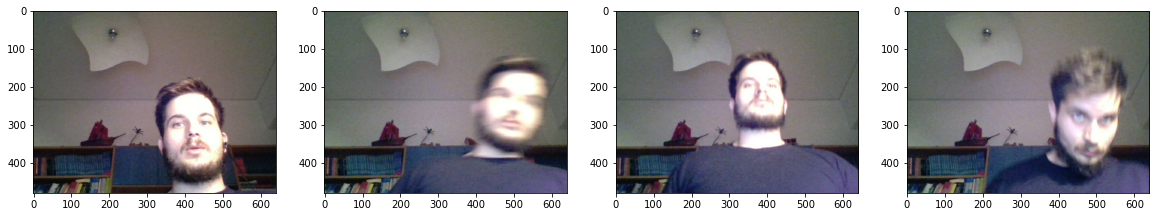

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [16]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

In [17]:
img = cv2.imread(os.path.join('data','train', 'images','f7a8b6a2-0b30-11ed-839d-a87eeaa23333.jpg'))
img.shape

(480, 640, 3)

In [11]:
pip install --user albumentations

  Using cached albumentations-1.2.1-py3-none-any.whl (116 kB)
  Using cached opencv_python_headless-4.6.0.66-cp36-abi3-win_amd64.whl (35.5 MB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import albumentations as alb

In [18]:
import albumentations as alb
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [19]:
img = cv2.imread(os.path.join('data','train', 'images','f6bc2ed3-0b30-11ed-b46a-a87eeaa23333.jpg'))
with open(os.path.join('data', 'train', 'labels', 'f6bc2ed3-0b30-11ed-b46a-a87eeaa23333.json'), 'r') as f:
    label = json.load(f)

In [20]:
label['shapes']

[{'label': 'face',
  'points': [[301.2335025380711, 269.03553299492387],
   [468.2385786802031, 421.3197969543147]],
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}}]

In [21]:
label['shapes'][0]['points']

[[301.2335025380711, 269.03553299492387],
 [468.2385786802031, 421.3197969543147]]

In [22]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords

[301.2335025380711, 269.03553299492387, 468.2385786802031, 421.3197969543147]

In [23]:
import numpy as np

In [24]:
coords = list(np.divide(coords, [640,480,640,480]))
coords

[0.4706773477157361,
 0.5604906937394247,
 0.7316227791878174,
 0.8777495769881557]

In [25]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [26]:
augmented

{'image': array([[[ 91, 100,  97],
         [ 89,  98,  95],
         [ 88,  97,  94],
         ...,
         [111, 125, 113],
         [112, 126, 114],
         [110, 127, 114]],
 
        [[ 90,  99,  96],
         [ 89,  98,  95],
         [ 89,  98,  95],
         ...,
         [112, 126, 115],
         [111, 125, 114],
         [108, 125, 112]],
 
        [[ 89,  98,  95],
         [ 90,  99,  96],
         [ 92, 101,  98],
         ...,
         [113, 127, 116],
         [111, 125, 114],
         [109, 123, 111]],
 
        ...,
 
        [[ 89, 104,  90],
         [ 83,  98,  84],
         [ 78,  93,  79],
         ...,
         [ 60,  80,  61],
         [ 63,  88,  68],
         [ 42,  68,  50]],
 
        [[ 81,  98,  84],
         [ 72,  91,  76],
         [ 67,  86,  71],
         ...,
         [ 50,  72,  53],
         [ 61,  85,  67],
         [ 50,  74,  56]],
 
        [[ 74,  93,  76],
         [ 63,  85,  67],
         [ 57,  79,  61],
         ...,
         [ 55,  74,

In [27]:
augmented['bboxes']

[(0.25058093626621536,
  0.5334122955442753,
  0.6217033276931754,
  0.8718217710095882)]

In [28]:
augmented['bboxes'][0][:2]

(0.25058093626621536, 0.5334122955442753)

In [29]:
augmented['bboxes'][0][2:]

(0.6217033276931754, 0.8718217710095882)

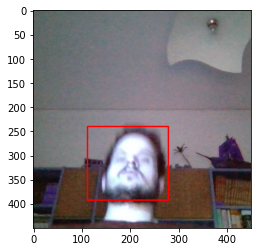

In [30]:
from matplotlib import pyplot as plt
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [32]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('data','aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('data','aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.9291164340101522, 0.8597715736040609, 0.649928616751269, 0.21150592216582062, 'face'].
x_max is less than or equal to x_min for bbox [0.8117306472081218, 0.7772842639593909, 0.5158867385786803, 0.2876480541455161, 'face'].
x_max is less than or equal to x_min for bbox [0.7443131345177665, 0.7899746192893401, 0.3897763324873097, 0.20516074450084604, 'face'].
x_max is less than or equal to x_min for bbox [0.7593829314720812, 0.8322758037225043, 0.4690910532994924, 0.14911167512690357, 'face'].
x_max is less than or equal to x_min for bbox [0.985429885786802, 0.870346869712352, 0.7831773477157361, 0.2961082910321489, 'face'].
x_max is less than or equal to x_min for bbox [0.8434565355329949, 0.7445008460236887, 0.46829790609137056, 0.24746192893401014, 'face'].
x_max is less than or equal to x_min for bbox [0.9148397842639595, 0.9200507614213198, 0.6023397842639594, 0.07825719120135365, 'face'].


In [33]:
train_images = tf.data.Dataset.list_files('data\\aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)
test_images = tf.data.Dataset.list_files('data\\aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)
val_images = tf.data.Dataset.list_files('data\\aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [34]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [41]:
train_labels = tf.data.Dataset.list_files('data\\aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
test_labels = tf.data.Dataset.list_files('data\\aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
val_labels = tf.data.Dataset.list_files('data\\aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [42]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.03986, 0.3784 , 0.5845 , 0.894  ], dtype=float16))

In [43]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3360, 3360, 840, 840, 780, 780)

In [46]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [61]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.    , 0.3083, 0.3318, 0.7188],
        [0.616 , 0.4097, 1.    , 0.958 ],
        [0.0998, 0.3306, 0.596 , 0.8   ],
        [0.4717, 0.462 , 0.9365, 0.956 ],
        [0.2717, 0.1207, 0.689 , 0.662 ],
        [0.    , 0.196 , 0.48  , 0.7837],
        [0.    , 0.    , 0.    , 0.    ],
        [0.7397, 0.5293, 1.    , 0.933 ]], dtype=float16))

In [56]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()
res[1][1][0]


array([0.    , 0.4146, 0.2251, 0.989 ], dtype=float16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


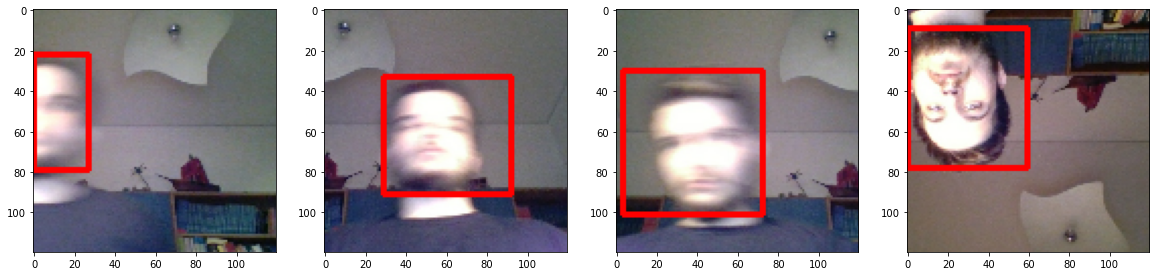

In [51]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [58]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 24s 0us/step


In [59]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [62]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model face detection  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model regression model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [63]:
facetracker = build_model()
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [65]:
X, y = train.as_numpy_iterator().next()
classes, coords = facetracker.predict(X)
classes, coords

1/1 [==============================] - 0s 288ms/step


(array([[0.51364326],
        [0.44161063],
        [0.43679687],
        [0.379057  ],
        [0.37727883],
        [0.4470944 ],
        [0.40015736],
        [0.48550323]], dtype=float32),
 array([[0.406958  , 0.36245883, 0.51069045, 0.42591166],
        [0.37928405, 0.2900658 , 0.43080366, 0.45162416],
        [0.4418036 , 0.41111445, 0.58669555, 0.63738185],
        [0.55399203, 0.4245118 , 0.4638585 , 0.5321742 ],
        [0.50779206, 0.38710344, 0.5621607 , 0.5449755 ],
        [0.5286232 , 0.42949533, 0.5182577 , 0.54140216],
        [0.52799135, 0.42422792, 0.47809988, 0.57994735],
        [0.4406186 , 0.3418805 , 0.44225565, 0.46492615]], dtype=float32))

In [66]:
len(train)

420

In [68]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch
lr_decay

0.0007936507936507934

In [69]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [70]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [71]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [100]:
y[0]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=uint8)

In [101]:
y[1]


array([[0.755  , 0.1152 , 1.     , 0.7764 ],
       [0.655  , 0.0902 , 1.     , 0.757  ],
       [0.1318 , 0.1404 , 0.7173 , 0.7856 ],
       [0.02635, 0.2551 , 0.6016 , 0.843  ],
       [0.1869 , 0.3337 , 0.864  , 0.7446 ],
       [0.05548, 0.332  , 0.556  , 0.771  ],
       [0.4287 , 0.254  , 0.904  , 0.8    ],
       [0.     , 0.     , 0.     , 0.     ]], dtype=float16)

In [83]:
coords

array([[0.406958  , 0.36245883, 0.51069045, 0.42591166],
       [0.37928405, 0.2900658 , 0.43080366, 0.45162416],
       [0.4418036 , 0.41111445, 0.58669555, 0.63738185],
       [0.55399203, 0.4245118 , 0.4638585 , 0.5321742 ],
       [0.50779206, 0.38710344, 0.5621607 , 0.5449755 ],
       [0.5286232 , 0.42949533, 0.5182577 , 0.54140216],
       [0.52799135, 0.42422792, 0.47809988, 0.57994735],
       [0.4406186 , 0.3418805 , 0.44225565, 0.46492615]], dtype=float32)

In [95]:
delta_coord = tf.reduce_sum(tf.square(y[1][:,:2] - y[1][:,:2]))
delta_coord.numpy()

0.0

In [97]:
localization_loss(y[1], coords).numpy()

4.4874916

In [99]:
classloss(y[0],coords).numpy()

0.730311

In [102]:
class FaceTracker(Model): 
    def __init__(self, facetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [103]:
model = FaceTracker(facetracker)

In [104]:
model.compile(opt, classloss, regressloss)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
420/420 [==============================] - 502s 1s/step - total_loss: 0.3053 - class_loss: 0.0524 - regress_loss: 0.2791 - val_total_loss: 3.2222 - val_class_loss: 3.5946 - val_regress_loss: 1.4249
Epoch 2/10
420/420 [==============================] - 593s 1s/step - total_loss: 0.0926 - class_loss: 0.0210 - regress_loss: 0.0821 - val_total_loss: 3.8139 - val_class_loss: 4.9332 - val_regress_loss: 1.3473
Epoch 3/10
420/420 [==============================] - 577s 1s/step - total_loss: 0.0498 - class_loss: 0.0098 - regress_loss: 0.0449 - val_total_loss: 5.6885 - val_class_loss: 7.1224 - val_regress_loss: 2.1273
Epoch 4/10
420/420 [==============================] - 580s 1s/step - total_loss: 0.0466 - class_loss: 0.0112 - regress_loss: 0.0410 - val_total_loss: 1.4851 - val_class_loss: 1.9902 - val_regress_loss: 0.4900
Epoch 5/10
420/420 [==============================] - 563s 1s/step - total_loss: 0.0306 - class_loss: 0.0068 - regress_loss: 0.0272 - val_total_loss: 4.8946 - val_c

In [ ]:
hist.history

In [ ]:

fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [ ]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [ ]:
from tensorflow.keras.models import load_model
facetracker.save('facetrack.h5')
facetracker = load_model('facetrack.h5')

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('FaceTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()